# **Datathon 3**
### **Team 23:** Brenleigh Jebb, Rebecca Lee, Madeline Wood
### **Student Numbers:** , 1005902917,
### **Date:** 10/31/23

---

### **Research Questions:**
1. What cognitive, clinical, and sociodemographic factors are related to likelihood of having Alzheimer’s disease (AD) and/or depression among older adults?

2. Can we develop a machine-learning algorithm that can successfully differentiate four patient clusters:
  * AD
  * depression
  * AD and depression
  * neither AD nor depression?


In [ ]:
# Import Libraries
from google.colab import files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data from github - this will work for everyone so no need to set differnt directories
df = pd.read_csv('https://raw.githubusercontent.com/brenleighj/5230/main/rush_ML_data.csv')
df.head()

,study,id,visit,rushst,DEMOGRAPHICS,age,age_fl,age_bl,age_bl_fl,age_first_ad_dx,...,cts_wliii,lang_tested,story_item1,delay_item1,cantread,count_na_cog,vis_before_death,AD_path,depression,AD_depress
0,ROS,21073,1,3,NaN,81.117043,81,80.013689,80,NaN,...,3.0,1,1.0,0.0,0.0,0,2,1,0,AD_no_depression
1,MAP,246264,3,1,NaN,93.034908,93,89.990418,89,NaN,...,10.0,1,9.0,5.0,0.0,0,2,1,0,AD_no_depression
2,MAP,285563,8,1,NaN,92.449008,92,84.703628,84,90.466804,...,10.0,1,5.0,2.0,0.0,0,2,1,0,AD_no_depression
3,MAP,402800,0,1,NaN,78.691307,78,78.691307,78,NaN,...,6.0,1,8.0,3.0,0.0,0,2,1,0,AD_no_depression
4,MAP,482428,0,1,NaN,81.379877,81,81.379877,81,NaN,...,10.0,1,17.0,10.0,0.0,0,2,0,0,noAD_no_depression


# **Part 1: Data Exploration and Cleaning**

We will explore available data and make exclusions to form our analytic sample, based on both practical and scientific considerations. We will then explore the missingness and distribution of data, and impute missing data using MICE.

In [ ]:
# creating a new data frame with only the veriables of interest

data = df[["study", "age", "sex", "race7", "spanish", "nativ", "cntry", "howlong", "marital_now_bl", "educ", "currjob", "ftpt", "retired", "income_bl",
          "q40inc", "discrim_cnt", "cogdx_stroke", "dxpark", "apoe_genotype", "katzsum", "iadlsum", "cesdsum", "chd_cogact_freq",
          "lifetime_cogact_freq_bl", "ma_adult_cogact_freq", "ya_adult_cogact_freq", "late_life_cogact_freq", "phys5itemsum", "late_life_soc_act",
          "social_isolation", "htm", "bmi", "wtkg", "ldai_bl", "alcohol_g", "smoking", "q3smo_bl", "q4smo_bl", "cancer_ever", "chf_ever", "chlstrl",
          "claudication_ever", "diabetes_sr_rx_ever", "hba1c", "hdlchlstrl", "ldlchlstrl", "hdlratio", "lipid_lowering_nonstatin_rx",
          "lipid_lowering_rx_ever", "tga", "headinjrloc_ever", "heart_ever", "sbp_avg", "dbp_avg", "hypertension_ever", "med_con_sum_ever",
          "r_ad", "r_cistrk", "r_depres", "r_ms", "r_parkis", "r_pd", "cpd", "r_stroke", "stroke_ever", "thyroid_ever", "vasc_3dis_sum",
          "vasc_4dis_sum", "vasc_risks_sum", "hearaid", "hearing1", "hearing2", "vision", "cts_mmse30", "cts_animals", "cts_bname", "cts_catflu",
          "cts_db", "cts_delay", "cts_df", "cts_doperf", "cts_ebdr", "cts_ebmt", "cts_fruits", "cts_idea", "cts_lopair", "cts_nccrtd", "cts_pmat",
          "cts_pmsub", "cts_read_nart", "cts_read_wrat", "cts_sdmt", "cts_story", "cts_stroop_cname", "cts_stroop_wread", "cts_wli", "cts_wlii",
          "cts_wliii", 'AD_depress']]

In [ ]:
# Exploring missingness and distribution of data (after data has been filtered)

print(data.shape)
print(data.info())
print(data.isna().sum())
print(data.describe(include='all'))

(1789, 99)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 99 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   study                        1789 non-null   object 
 1   age                          1789 non-null   float64
 2   sex                          1789 non-null   int64  
 3   race7                        1789 non-null   int64  
 4   spanish                      1789 non-null   int64  
 5   nativ                        1760 non-null   float64
 6   cntry                        1760 non-null   float64
 7   howlong                      73 non-null     float64
 8   marital_now_bl               784 non-null    float64
 9   educ                         1788 non-null   float64
 10  currjob                      1788 non-null   float64
 11  ftpt                         515 non-null    float64
 12  retired                      1788 non-null   float64
 13  income_

In [ ]:
# Set the maximum number of rows and columns to display so we can see all of the data
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data.isnull().sum()
missing_value_counts

study                             0
age                               0
sex                               0
race7                             0
spanish                           0
nativ                            29
cntry                            29
howlong                        1716
marital_now_bl                 1005
educ                              1
currjob                           1
ftpt                           1274
retired                           1
income_bl                       983
q40inc                         1024
discrim_cnt                    1620
cogdx_stroke                      6
dxpark                            6
apoe_genotype                    54
katzsum                          12
iadlsum                          26
cesdsum                           0
chd_cogact_freq                 931
lifetime_cogact_freq_bl         923
ma_adult_cogact_freq            925
ya_adult_cogact_freq            924
late_life_cogact_freq           867
phys5itemsum                

## Analysis of missing values and independence

- age (0)
- sex (0) - binary ( 1’s and 2’s)
- race7 (0)  - we note that race does have unknown values - its just labeled as 7
- spanish (0) - binary
- nativ (29)
- cntry (29) - no description for this variable
- **howlong (1716) - remove**
- **marital_now_bl (1005) - remove**
- educ(1)
- currjob (1) - binary - can’t find in the codebook
- **ftpt (1274) - remove - can’t find in the code book**
- retired (1) - binary
- **income_bl (983) consider removing**
- **q40inc (1024) - consider removing**
- **discrim_cnt (1620) consider removing**
- ** cogdx_stroke (6) binary - 3 stroke veriables total - reduce to 1 ** <font color="red">might be worth keeping since it relates to cognitive impairment due to stroke diagnosis?</font>
- dxpark (6) - ordinal / nominal
- apoe_genotype (54) - categorical but numerically labeled
- katzsum (12) - discrete / ordinal
- iadlsum (26) - discrete / ordinal
- **cesdsum (0)  - this is a measure of depressive symptoms, so it could be highly correlated with our outcome of interest - CONSIDER REMOVING** <font color="red">might be worth keeping since depressive symptoms != diagnosis</font>
- **chd_cogact_freq (931)**
- **lifetime_cogact_freq_bl (923)**
- **ma_adult_cogact_freq (925)**
- **ya_adult_cogact_freq (924)**
- **late_life_cogact_freq (867)**
- phys5itemsum (62) - continuous
- **late_life_soc_act (866)**
- **social_isolation (911)**
- htm (227) - continuous
- **bmi (251) - continuous - if we have hight and weight - we should probably remove BMI or remove height and weight** <font color="red">AGREE</font>
- wtkg (216) - continuous
- ldai_bl (10) - ordinal
- **alcohol_g (1750) - remove plus there is already an alcohol metric **
- smoking (5)
- **q3smo_bl (1267) - remove - also too similar to “smoking” variable**
- **q4smo_bl (1271) - remove - again too similar to “smoking”**
- cancer_ever (0)
- **chf_ever (1006) - HMMM could assume an NA is a no? Binary**
- **chlstrl (827) - missing lots of data but could be a key metric**
- claudication_ever (2) - binary
- diabetes_sr_rx_ever (0) - binary
- **hba1c (1144) - lots of missing values - continuous variable**
- **hdlchlstrl (827)**
- **ldlchlstrl (837)**
- **hdlratio (827)**
** note - if keeping cholesterol variables - ratio probably needs to be removed - its not independent **
- ** lipid_lowering_nonstatin_rx (0) probably redunced with the veriable below?**
- lipid_lowering_rx_ever (0) - binary
- **tga (827) remove? - continuous**
- headinjrloc_ever (24) - binary
- heart_ever (0) - binary
- sbp_avg (143) - blood pressure - cont
- dbp_avg (145) - blood pressure - cont
- hypertension_ever (0) - binary
- ** med_con_sum_ever (0) - ordinal - redundent over cancer, diabetes, heart disease and other medical veribles**
- r_ad (5) - ordinal
- r_cistrk (215) - ordinal **possible redundance with stroke veriables**
- **r_depres (8) - ordinal clinical depression - Highly correlated with the outcome of interest - should be removed for predictive modeling**
- r_ms (39) - binary note ** ‘9’ is missing - so replace 9 with NA’s
- r_parkis (215) - ordinal
- r_pd (136)
- cpd (29) - binary
** these three are highly correlated variables - need to pick one - the variables are asking almost the same thing** <font color="red"> should keep r_pd b/c it has the least missing data and almost all the values in cpd are 0 -> prob not good for any model we try </font>
- r_stroke (234) - ordinal
- stroke_ever (9)
** variables could be combined - stroke - if yes, report the number** <font color="red"> I don't think they can be combined - some pt have stroke not present (4) in r_stroke but stroke_ever == 1 </font>
- thyroid_ever (0) - binary
- ** vasc_3dis_sum (1)**
- ** vasc_4dis_sum (834) **
- ** vasc_risks_sum (1)**
** These variables are an average of vascular disease variables - like stroke and heart condition which are already accounted for in other variables. We should consider removing ** <font color="red"> agree </font>
- **hearaid (977)**
- **hearing1 (890)**
- **hearing2 (890)**
- vision (64)
- cts_mmse30 (0) - cont - note this is a measure of dementia
- cts_animals (0)
- cts_bname (6) - ordinal
- cts_catflu (0) - ordinal
- cts_db (8) - ordinal
- cts_delay (7)
- cts_df (2)
- cts_doperf (73)
- cts_ebdr (10)
- cts_ebmt (14)
- cts_fruits (0)
- cts_idea (1)
- cts_lopair (45)
- cts_nccrtd (17)
- cts_pmat (98)
- cts_pmsub (51)
- cts_read_nart (70)
- **cts_read_wrat (1729) - remove **
- cts_sdmt (55)
- cts_story (4)
- **cts_stroop_cname (770)**
- **cts_stroop_wread (770)**
- cts_wli (4)
- cts_wlii (5)
- cts_wliii (3)
- AD_depress (0)


Bolded veriables to be considered for removal:
- approx 50% + missing data
- veriables are correlated with eachother or the outcome of interest
## opinions on the list?


Some other ideas
- combining race, native and the spanish veriable since they all capture similar data

As mentioned above need to combine or remove the "duplication" data for
- stroke variables
- parkinsons
- vascular sums




In [ ]:
from collections import Counter

print(Counter(data["study"])) # ROS 834; MAP 914; MARS 41

missing_ros = data[data["study"]=="ROS"].isnull().sum()
missing_map = data[data["study"]=="MAP"].isnull().sum()
missing_mars = data[data["study"]=="MARS"].isnull().sum()

df_missing = pd.DataFrame([missing_ros, missing_map, missing_mars])
df_missing.T

Counter({'MAP': 914, 'ROS': 834, 'MARS': 41})


,0,1,2
study,0,0,0
age,0,0,0
sex,0,0,0
race7,0,0,0
spanish,0,0,0
nativ,0,29,0
cntry,0,29,0
howlong,796,880,40
marital_now_bl,834,171,0
educ,1,0,0


### **Update from below list: filtered by study, lots of variables which were not collected**
---
**entirely missing from ROS:**
- marital_now_bl
- income_bl
- q40inc
- discrim_cnt
- chd_cogact_freq
- lifetime_cogact_freq_bl
- ma_adult_cogact_freq
- ya_adult_cogact_freq
- late_life_cogact_freq
- late_life_soc_act
- social_isolation
- alcohol_g
- chf_ever
- casc_4dis_sum
- hearing1
- hearing2

**missing entirely from MAP:**
- alcohol_g
- hearaid

**missing entirely from MARS:**
- howlong (only has 1 value)
- phys5itemsum
- q3smo_bl
- q4smo_bl
- hearaid
- cts_read_nart

In [ ]:
### Removing variables with too much missing data -> based on what was proposed above

# chlstrl, cogdx_stroke kept in
# removed the three sum stroke variables

data_redu = data[["age", "sex", "race7", "spanish", "nativ", "cntry", "educ", "currjob", "retired", "cogdx_stroke", "dxpark", "apoe_genotype", "katzsum", "iadlsum", "cesdsum", "phys5itemsum",
"htm", "wtkg", "ldai_bl", "smoking", "cancer_ever", "chlstrl", "claudication_ever", "diabetes_sr_rx_ever", "lipid_lowering_nonstatin_rx", "lipid_lowering_rx_ever",
"headinjrloc_ever", "heart_ever", "sbp_avg", "dbp_avg", "hypertension_ever", "r_ad", "r_cistrk", "r_ms", "r_pd", "r_stroke", "stroke_ever", "thyroid_ever",
"vasc_3dis_sum", "vision", "cts_mmse30", "cts_animals", "cts_bname", "cts_catflu", "cts_db", "cts_delay", "cts_df", "cts_doperf", "cts_ebdr", "cts_ebmt", "cts_fruits",
"cts_idea", "cts_lopair", "cts_nccrtd", "cts_pmat", "cts_pmsub", "cts_read_nart", "cts_sdmt", "cts_story", "cts_wli", "cts_wlii", "cts_wliii", "AD_depress"]]

pd.set_option('display.max_columns', None)  # Display all columns
data_redu.head()



,age,sex,race7,spanish,nativ,cntry,educ,currjob,retired,cogdx_stroke,dxpark,apoe_genotype,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_ad,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,AD_depress
0,81.117043,2,1,0,1.0,1.0,22.0,1.0,0.0,2.0,2.0,34.0,0.0,6.0,1,0.250000,1.498603,48.5352,0.0,0.0,0,198.0,0.0,0,0,1,0.0,1,138.0,69.5,0,2.0,4.0,0.0,4.0,4.0,0.0,0,1.0,1.0,18.0,5,6.0,10,2.0,0.0,9.0,5.0,0.0,3.0,5,7.0,4.0,16.0,11.0,8.0,9.0,12.0,1.0,8.0,0.0,3.0,AD_no_depression
1,93.034908,2,1,0,1.0,1.0,16.0,0.0,1.0,2.0,2.0,33.0,0.0,1.0,1,7.166667,1.549403,60.7824,0.0,0.0,0,170.0,1.0,0,0,0,0.0,1,118.0,70.5,0,4.0,4.0,0.0,4.0,4.0,0.0,0,0.0,2.0,26.0,21,14.0,31,5.0,5.0,7.0,7.0,10.0,10.0,10,7.0,7.0,19.0,12.0,9.0,9.0,29.0,9.0,21.0,7.0,10.0,AD_no_depression
2,92.449008,2,1,0,1.0,1.0,12.0,0.0,0.0,2.0,2.0,33.0,4.0,7.0,0,0.000000,NaN,NaN,0.0,0.0,0,227.0,1.0,0,0,0,0.0,0,NaN,NaN,1,2.0,4.0,0.0,4.0,4.0,0.0,1,1.0,NaN,20.0,7,10.0,17,2.0,2.0,5.0,6.0,0.0,8.0,10,7.0,3.0,7.0,7.0,3.0,7.0,4.0,5.0,12.0,0.0,10.0,AD_no_depression
3,78.691307,2,1,0,1.0,1.0,16.0,0.0,1.0,1.0,2.0,34.0,0.0,4.0,0,2.708333,1.574803,42.6384,0.0,0.0,0,171.0,0.0,0,0,1,0.0,0,NaN,NaN,0,1.0,3.0,0.0,4.0,2.0,1.0,0,1.0,1.0,17.0,10,12.0,18,5.0,3.0,11.0,2.0,0.0,9.0,8,5.0,2.0,6.0,3.0,2.0,9.0,2.0,8.0,14.0,1.0,6.0,AD_no_depression
4,81.379877,2,1,0,1.0,1.0,12.0,0.0,1.0,1.0,2.0,23.0,0.0,2.0,0,0.583333,1.549403,NaN,0.0,0.0,1,194.0,0.0,0,0,0,0.0,0,140.0,62.0,1,4.0,4.0,0.0,3.0,1.0,1.0,1,1.0,1.0,30.0,15,15.0,33,6.0,10.0,6.0,7.0,11.0,11.0,18,8.0,7.0,30.0,11.0,7.0,6.0,49.0,17.0,17.0,4.0,10.0,noAD_no_depression


##Converting categorical veribles
- remove veriables that use "9" as an "unknown" or veribales that dont use equal scales - i think this will mess with the scaling - and with the distance calculations in K-means.
  - dxpark - **no missing values**
  - race7 -> missing = 7
  - apoe genotype - numeric values represent categories but numberically arn't similar spaced
  
  other veribles of concern for scaling?
  - can consider modifiying the binary veriables from 1,2 -> 0,1 but i dont think this matters for k-means



In [ ]:
#Fixing levels for apoe Genotype

# Define a mapping of the old levels to new labels
level_mapping = {
    22: 1,
    23: 2,
    24: 3,
    33: 4,
    34: 5,
    44: 6,
}

#Sorry idk why it would only work on a copied df?
data_redu_copy = data_redu.copy()

# Use the map() function to replace the old levels with new labels
data_redu_copy['apoe_genotype'] = data_redu_copy['apoe_genotype'].map(level_mapping)



In [ ]:
data_redu_copy['apoe_genotype']

0       5.0
1       4.0
2       4.0
3       5.0
4       2.0
5       4.0
6       4.0
7       4.0
8       4.0
9       4.0
10      5.0
11      4.0
12      4.0
13      4.0
14      4.0
15      4.0
16      2.0
17      4.0
18      2.0
19      2.0
20      NaN
21      4.0
22      5.0
23      2.0
24      2.0
25      5.0
26      2.0
27      2.0
28      4.0
29      4.0
30      6.0
31      4.0
32      4.0
33      2.0
34      4.0
35      4.0
36      4.0
37      5.0
38      2.0
39      4.0
40      4.0
41      3.0
42      5.0
43      5.0
44      4.0
45      4.0
46      NaN
47      4.0
48      NaN
49      2.0
50      2.0
51      4.0
52      4.0
53      4.0
54      4.0
55      5.0
56      5.0
57      4.0
58      5.0
59      4.0
60      3.0
61      4.0
62      2.0
63      4.0
64      5.0
65      5.0
66      4.0
67      4.0
68      2.0
69      4.0
70      5.0
71      4.0
72      4.0
73      2.0
74      5.0
75      5.0
76      5.0
77      5.0
78      4.0
79      2.0
80      4.0
81      6.0
82      4.0
83  

In [ ]:
# converting categorical data into a numerical value
data_redu_copy['AD_depress'].replace({"noAD_no_depression": 0, "AD_no_depression": 1, "no_AD_depression": 2, "AD_depression": 3}, inplace=True)

# ldai is reported in as a weighted value, converting to categorical
data_redu_copy['ldai_bl'].replace({6.0: 0, 4.5: 1, 2.5: 2, 1.0: 3, 0.8: 4, 0.4: 5, 0.2: 6, 0.1: 7, 0.0: 8}, inplace=True)


In [ ]:
#converting  currjob and retired - 9 to na
data_redu_copy['currjob'] = data_redu_copy['currjob'].replace(9, np.nan)
data_redu_copy['retired'] = data_redu_copy['retired'].replace(9, np.nan)
data_redu_copy['race7'] = data_redu_copy['race7'].replace(7, np.nan)


In [ ]:
#checking to see if that worked
df['currjob'].isna().sum()

1

##ML pipeline
1. Cross validation
2. Split train test
3. Imputation
4. Normalization


##Imputation and Normalization

In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns
data_redu_copy.head()

,age,sex,race7,spanish,nativ,cntry,educ,currjob,retired,cogdx_stroke,dxpark,apoe_genotype,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_ad,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,AD_depress
0,81.117043,2,1.0,0,1.0,1.0,22.0,1.0,0.0,2.0,2.0,5.0,0.0,6.0,1,0.250000,1.498603,48.5352,8.0,0.0,0,198.0,0.0,0,0,1,0.0,1,138.0,69.5,0,2.0,4.0,0.0,4.0,4.0,0.0,0,1.0,1.0,18.0,5,6.0,10,2.0,0.0,9.0,5.0,0.0,3.0,5,7.0,4.0,16.0,11.0,8.0,9.0,12.0,1.0,8.0,0.0,3.0,1
1,93.034908,2,1.0,0,1.0,1.0,16.0,0.0,1.0,2.0,2.0,4.0,0.0,1.0,1,7.166667,1.549403,60.7824,8.0,0.0,0,170.0,1.0,0,0,0,0.0,1,118.0,70.5,0,4.0,4.0,0.0,4.0,4.0,0.0,0,0.0,2.0,26.0,21,14.0,31,5.0,5.0,7.0,7.0,10.0,10.0,10,7.0,7.0,19.0,12.0,9.0,9.0,29.0,9.0,21.0,7.0,10.0,1
2,92.449008,2,1.0,0,1.0,1.0,12.0,0.0,0.0,2.0,2.0,4.0,4.0,7.0,0,0.000000,NaN,NaN,8.0,0.0,0,227.0,1.0,0,0,0,0.0,0,NaN,NaN,1,2.0,4.0,0.0,4.0,4.0,0.0,1,1.0,NaN,20.0,7,10.0,17,2.0,2.0,5.0,6.0,0.0,8.0,10,7.0,3.0,7.0,7.0,3.0,7.0,4.0,5.0,12.0,0.0,10.0,1
3,78.691307,2,1.0,0,1.0,1.0,16.0,0.0,1.0,1.0,2.0,5.0,0.0,4.0,0,2.708333,1.574803,42.6384,8.0,0.0,0,171.0,0.0,0,0,1,0.0,0,NaN,NaN,0,1.0,3.0,0.0,4.0,2.0,1.0,0,1.0,1.0,17.0,10,12.0,18,5.0,3.0,11.0,2.0,0.0,9.0,8,5.0,2.0,6.0,3.0,2.0,9.0,2.0,8.0,14.0,1.0,6.0,1
4,81.379877,2,1.0,0,1.0,1.0,12.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0,0.583333,1.549403,NaN,8.0,0.0,1,194.0,0.0,0,0,0,0.0,0,140.0,62.0,1,4.0,4.0,0.0,3.0,1.0,1.0,1,1.0,1.0,30.0,15,15.0,33,6.0,10.0,6.0,7.0,11.0,11.0,18,8.0,7.0,30.0,11.0,7.0,6.0,49.0,17.0,17.0,4.0,10.0,0


In [ ]:
# Imputing missing data using MICE - code from pipeline tutorial

from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_redu_copy = data_redu_copy.replace('NA', np.nan) #changing the na values to something python recognizes
imputer = IterativeImputer(max_iter = 10, random_state=0)
data_mice = imputer.fit_transform(data_redu_copy.drop('AD_depress', axis=1))


In [ ]:
#check for missing values

#need to convert back to a dataframe for this to work
data_mice = pd.DataFrame(data_mice)
missing_value_counts_mice = data_mice.isnull().sum()
missing_value_counts_mice

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
dtype: int64

In [ ]:
#Standardizing
# Required libraries
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
st_data_mice = st_x.fit_transform(data_mice)

In [ ]:
st_data_mice
#again - resulting data set is a numpy.ndarry

array([[-0.81488818,  0.69262928, -0.212736  , ..., -1.2005802 ,
        -1.32756757, -2.38764379],
       [ 1.01166453,  0.69262928, -0.212736  , ...,  0.9761049 ,
         1.04526025,  0.60321533],
       [ 0.92186846,  0.69262928, -0.212736  , ..., -0.53083094,
        -1.32756757,  0.60321533],
       ...,
       [-0.68187251,  0.69262928, -0.212736  , ...,  0.47379296,
         1.38423565,  0.60321533],
       [ 0.04362936,  0.69262928, -0.212736  , ..., -0.53083094,
        -0.31064136,  0.17594974],
       [-0.87950778,  0.69262928, -0.212736  , ...,  0.64123027,
         0.70628485,  0.17594974]])

In [ ]:
#trying to preserve the veriable names and keep in dataframe rather than numpy array
data_redu_copy_drop = data_redu_copy.drop('AD_depress', axis=1)
column_names = data_redu_copy_drop.columns

# Step 3: Create a new DataFrame with imputed data and original column names
st_data_mice_df = pd.DataFrame(st_data_mice, columns=column_names)




In [ ]:
#viewing the now normalised and imputed data!!
#Note this data does not contain outcome
st_data_mice_df.head()

,age,sex,race7,spanish,nativ,cntry,educ,currjob,retired,cogdx_stroke,dxpark,apoe_genotype,katzsum,iadlsum,cesdsum,phys5itemsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_ad,r_cistrk,r_ms,r_pd,r_stroke,stroke_ever,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii
0,-0.814888,0.692629,-0.212736,-0.164257,-0.212885,-0.041207,1.576752,1.349386,-1.908173,0.551834,0.225509,1.137016,-0.651972,1.133049,-0.231190,-0.653874,-1.201178,-1.320971,0.630525,-0.640935,-0.914743,0.549139,-0.630156,-0.530583,-0.206254,1.045178,-0.326561,1.955020,0.321214,-0.224209,-1.440098,-0.988420,0.144868,-0.041083,0.572079,0.268245,-0.507050,-0.611588,0.525104,-0.746722,-1.507005,-1.369294,-3.028959,-1.427718,-1.634308,-1.370976,0.668541,-0.679554,-1.961847,-1.903028,-1.300903,-0.551646,-1.375952,-0.404182,0.433412,0.655780,0.519531,-1.197517,-1.540832,-1.200580,-1.327568,-2.387644
1,1.011665,0.692629,-0.212736,-0.164257,-0.212885,-0.041207,-0.081976,-0.570984,0.356550,0.551834,0.225509,0.033489,-0.651972,-0.845129,-0.231190,1.736905,-0.702235,-0.553365,0.630525,-0.640935,-0.914743,-0.362711,1.587873,-0.530583,-0.206254,-0.956775,-0.326561,1.955020,-0.741584,-0.130019,-1.440098,0.870759,0.144868,-0.041083,0.572079,0.268245,-0.507050,-0.611588,-0.817163,-0.109301,0.180938,1.390700,0.451308,0.495133,-0.182603,-0.505740,-0.283272,0.338524,0.766729,0.618534,-0.451145,-0.551646,-0.531235,-0.030541,0.747396,1.162417,0.519531,0.110679,-0.117490,0.976105,1.045260,0.603215
2,0.921868,0.692629,-0.212736,-0.164257,-0.212885,-0.041207,-1.187795,-0.570984,-1.908173,0.551834,0.225509,0.033489,1.812014,1.528685,-0.768332,-0.740287,-0.999220,-0.675623,0.630525,-0.640935,-0.914743,1.493555,1.587873,-0.530583,-0.206254,-0.956775,-0.326561,-0.511504,0.105448,0.115618,0.694397,-0.988420,0.144868,-0.041083,0.572079,0.268245,-0.507050,1.635088,0.525104,0.819063,-1.085019,-1.024295,-1.288826,-0.786767,-1.634308,-1.024882,-1.235085,-0.170515,-1.961847,-0.101912,-0.451145,-0.551646,-1.657525,-1.525102,-0.822526,-1.877404,-0.307653,-1.813138,-0.829161,-0.530831,-1.327568,0.603215
3,-1.186661,0.692629,-0.212736,-0.164257,-0.212885,-0.041207,-0.081976,-0.570984,0.356550,-1.813804,0.225509,1.137016,-0.651972,0.341778,-0.768332,0.195861,-0.452763,-1.690558,0.630525,-0.640935,-0.914743,-0.330145,-0.630156,-0.530583,-0.206254,1.045178,-0.326561,-0.511504,-0.443938,-0.279866,-1.440098,-1.918010,-1.901360,-0.041083,0.572079,-2.870030,1.971118,-0.611588,0.525104,-0.746722,-1.717998,-0.506796,-0.418759,-0.695203,-0.182603,-0.851835,1.620355,-2.206673,-1.961847,0.258311,-0.791048,-2.824229,-1.939097,-1.649649,-2.078464,-2.384040,0.519531,-1.967044,-0.295408,-0.195956,-0.988592,-1.105847
4,-0.774606,0.692629,-0.212736,-0.164257,-0.212885,-0.041207,-1.187795,-0.570984,0.356550,-1.813804,0.225509,-2.173566,-0.651972,-0.449494,-0.768332,-0.538655,-0.702235,-0.640904,0.630525,-0.640935,1.093203,0.418874,-0.630156,-0.530583,-0.206254,-0.956775,-0.326561,-0.511504,0.427494,-0.930638,0.694397,0.870759,0.144868,-0.041083,-0.963555,-4.439167,1.971118,1.635088,0.525104,-0.746722,1.024910,0.355702,0.886342,0.678262,0.301299,0.359495,-0.759179,0.338524,1.039587,0.978757,0.908466,0.584645,-0.531235,1.339473,0.433412,0.149143,-0.721245,1.649733,1.305851,0.306356,0.028334,0.603215


##K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


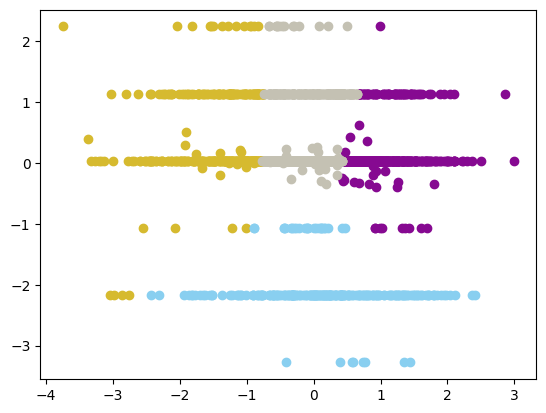

In [ ]:
# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#c4c1b3', "#89CFF0"]
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

# Choose two features for clustering and visualization
features = ['age', 'apoe_genotype']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data_features =  st_data_mice_df[features].to_numpy()

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data_features)

# Visualize the clustering results using the defined function
plot_clusters(data_features, label, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


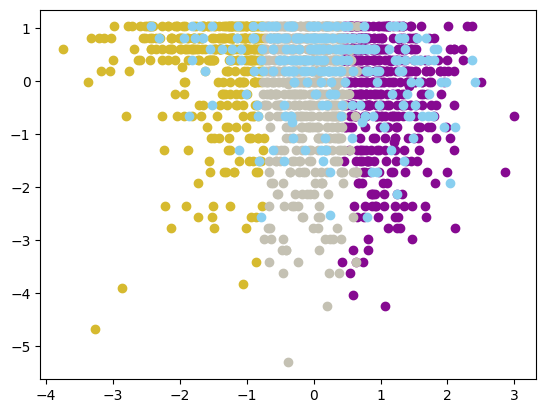

In [ ]:
#looking at K-Means with different features for visulization

# Choose two features for clustering and visualization
features2 = ['age', 'cts_mmse30']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data_features2 =  st_data_mice_df[features2].to_numpy()

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data_features)

# Visualize the clustering results using the defined function
plot_clusters(data_features2, label, 4)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


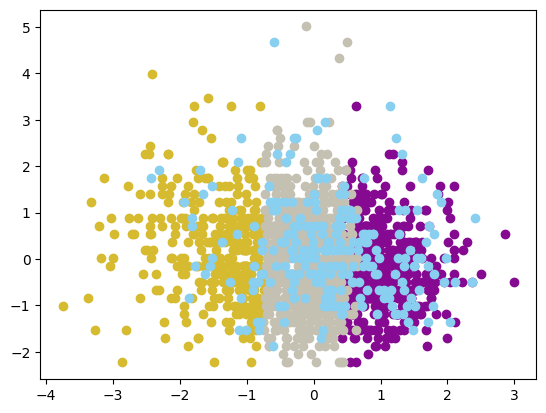

In [ ]:
#looking at K-Means with different features for visulization

# Choose two features for clustering and visualization
features2 = ['age', 'cts_animals']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data_features2 =  st_data_mice_df[features2].to_numpy()

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data_features)

# Visualize the clustering results using the defined function
plot_clusters(data_features2, label, 4)

In [ ]:
#looking at K-Means with different features for visulization

# Choose two features for clustering and visualization
features3 = ['wtkg', 'chlstrl']

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data_features3 =  st_data_mice_df[features3].to_numpy()

# Apply k-means clustering on the standardized data
# Here, we're specifying 4 clusters with a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(data_features)

# Visualize the clustering results using the defined function
plot_clusters(data_features3, label, 4)

KeyError: ignored

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list to store WCSS values for different k
wcss = []

# Choose a range of k values
k_values = range(1, 20)

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(st_data_mice_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Linear Discriminant Analysis

note: I think we should be using LDA instead of categoricalNB -> since depression increases risk of AD, our 4 outcomes of interest aren't conditionally independent anymore and LDA doesn't function under this assumption; LDA also assumes they share the same covariance matrix, which they seem to do

note 2: I removed some more features as they were highly correlated, did not have a gaussian-like distribution so it was throwing off the model for the class AD_no_depression for some reason

note 3: tried 1) cross-validation via stratified k-fold method for even ratio of classes and 2) oversampling to get same number per classes in each split and normal stratified k-fold method seemed to perform better

### 1. Preparing Data

In [ ]:
data_nb = pd.DataFrame(data_redu)

# based on below correlation matrices, removing highly correlated features
data_nb = data_nb.drop(['stroke_ever', 'r_ms', 'cntry', 'phys5itemsum'], axis=1)

# ldai is reported in as a weighted value, converting to categorical
data_nb['ldai_bl'].replace({6.0: 0, 4.5: 1, 2.5: 2, 1.0: 3, 0.8: 4, 0.4: 5, 0.2: 6, 0.1: 7, 0.0: 8}, inplace=True)

data_nb = data_nb.replace('NA', np.nan)

data_nb.head()

,age,sex,race7,spanish,nativ,educ,currjob,retired,cogdx_stroke,dxpark,apoe_genotype,katzsum,iadlsum,cesdsum,htm,wtkg,ldai_bl,smoking,cancer_ever,chlstrl,claudication_ever,diabetes_sr_rx_ever,lipid_lowering_nonstatin_rx,lipid_lowering_rx_ever,headinjrloc_ever,heart_ever,sbp_avg,dbp_avg,hypertension_ever,r_ad,r_cistrk,r_pd,r_stroke,thyroid_ever,vasc_3dis_sum,vision,cts_mmse30,cts_animals,cts_bname,cts_catflu,cts_db,cts_delay,cts_df,cts_doperf,cts_ebdr,cts_ebmt,cts_fruits,cts_idea,cts_lopair,cts_nccrtd,cts_pmat,cts_pmsub,cts_read_nart,cts_sdmt,cts_story,cts_wli,cts_wlii,cts_wliii,AD_depress
0,81.117043,2,1,0,1.0,22.0,1.0,0.0,2.0,2.0,34.0,0.0,6.0,1,1.498603,48.5352,8.0,0.0,0,198.0,0.0,0,0,1,0.0,1,138.0,69.5,0,2.0,4.0,4.0,4.0,0,1.0,1.0,18.0,5,6.0,10,2.0,0.0,9.0,5.0,0.0,3.0,5,7.0,4.0,16.0,11.0,8.0,9.0,12.0,1.0,8.0,0.0,3.0,AD_no_depression
1,93.034908,2,1,0,1.0,16.0,0.0,1.0,2.0,2.0,33.0,0.0,1.0,1,1.549403,60.7824,8.0,0.0,0,170.0,1.0,0,0,0,0.0,1,118.0,70.5,0,4.0,4.0,4.0,4.0,0,0.0,2.0,26.0,21,14.0,31,5.0,5.0,7.0,7.0,10.0,10.0,10,7.0,7.0,19.0,12.0,9.0,9.0,29.0,9.0,21.0,7.0,10.0,AD_no_depression
2,92.449008,2,1,0,1.0,12.0,0.0,0.0,2.0,2.0,33.0,4.0,7.0,0,NaN,NaN,8.0,0.0,0,227.0,1.0,0,0,0,0.0,0,NaN,NaN,1,2.0,4.0,4.0,4.0,1,1.0,NaN,20.0,7,10.0,17,2.0,2.0,5.0,6.0,0.0,8.0,10,7.0,3.0,7.0,7.0,3.0,7.0,4.0,5.0,12.0,0.0,10.0,AD_no_depression
3,78.691307,2,1,0,1.0,16.0,0.0,1.0,1.0,2.0,34.0,0.0,4.0,0,1.574803,42.6384,8.0,0.0,0,171.0,0.0,0,0,1,0.0,0,NaN,NaN,0,1.0,3.0,4.0,2.0,0,1.0,1.0,17.0,10,12.0,18,5.0,3.0,11.0,2.0,0.0,9.0,8,5.0,2.0,6.0,3.0,2.0,9.0,2.0,8.0,14.0,1.0,6.0,AD_no_depression
4,81.379877,2,1,0,1.0,12.0,0.0,1.0,1.0,2.0,23.0,0.0,2.0,0,1.549403,NaN,8.0,0.0,1,194.0,0.0,0,0,0,0.0,0,140.0,62.0,1,4.0,4.0,3.0,1.0,1,1.0,1.0,30.0,15,15.0,33,6.0,10.0,6.0,7.0,11.0,11.0,18,8.0,7.0,30.0,11.0,7.0,6.0,49.0,17.0,17.0,4.0,10.0,noAD_no_depression


In [ ]:
# Categorizing Columns

target_column = ['AD_depress']
categorical_columns = ['sex', 'race7', 'spanish', 'nativ', 'currjob', 'ldai_bl',
       'retired', 'cogdx_stroke', 'dxpark', 'katzsum', 'iadlsum', 'cesdsum',
       'smoking', 'cancer_ever', 'claudication_ever', 'diabetes_sr_rx_ever', 'lipid_lowering_nonstatin_rx',
       'lipid_lowering_rx_ever', 'headinjrloc_ever', 'heart_ever', 'hypertension_ever', 'r_ad', 'r_cistrk', 'r_pd',
       'r_stroke', 'thyroid_ever', 'vasc_3dis_sum', 'vision']

       # removed stroke_ever, r_ms, cntry, phys5itemsum

cognitive = ['cts_mmse30', 'cts_animals', 'cts_bname', 'cts_catflu', 'cts_db',
       'cts_delay', 'cts_df', 'cts_doperf', 'cts_ebdr', 'cts_ebmt',
       'cts_fruits', 'cts_idea', 'cts_lopair', 'cts_nccrtd', 'cts_pmat',
       'cts_pmsub', 'cts_read_nart', 'cts_sdmt', 'cts_story', 'cts_wli',
       'cts_wlii', 'cts_wliii']

multinomial_columns = ['apoe_genotype']
numerical_columns = [i for i in data_nb.columns if i not in categorical_columns + target_column + multinomial_columns + cognitive]


### 1.1 Data Exploration

In [ ]:
# Distribution of Numerical Features

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns+multinomial_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_nb, x=column, hue='AD_depress', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

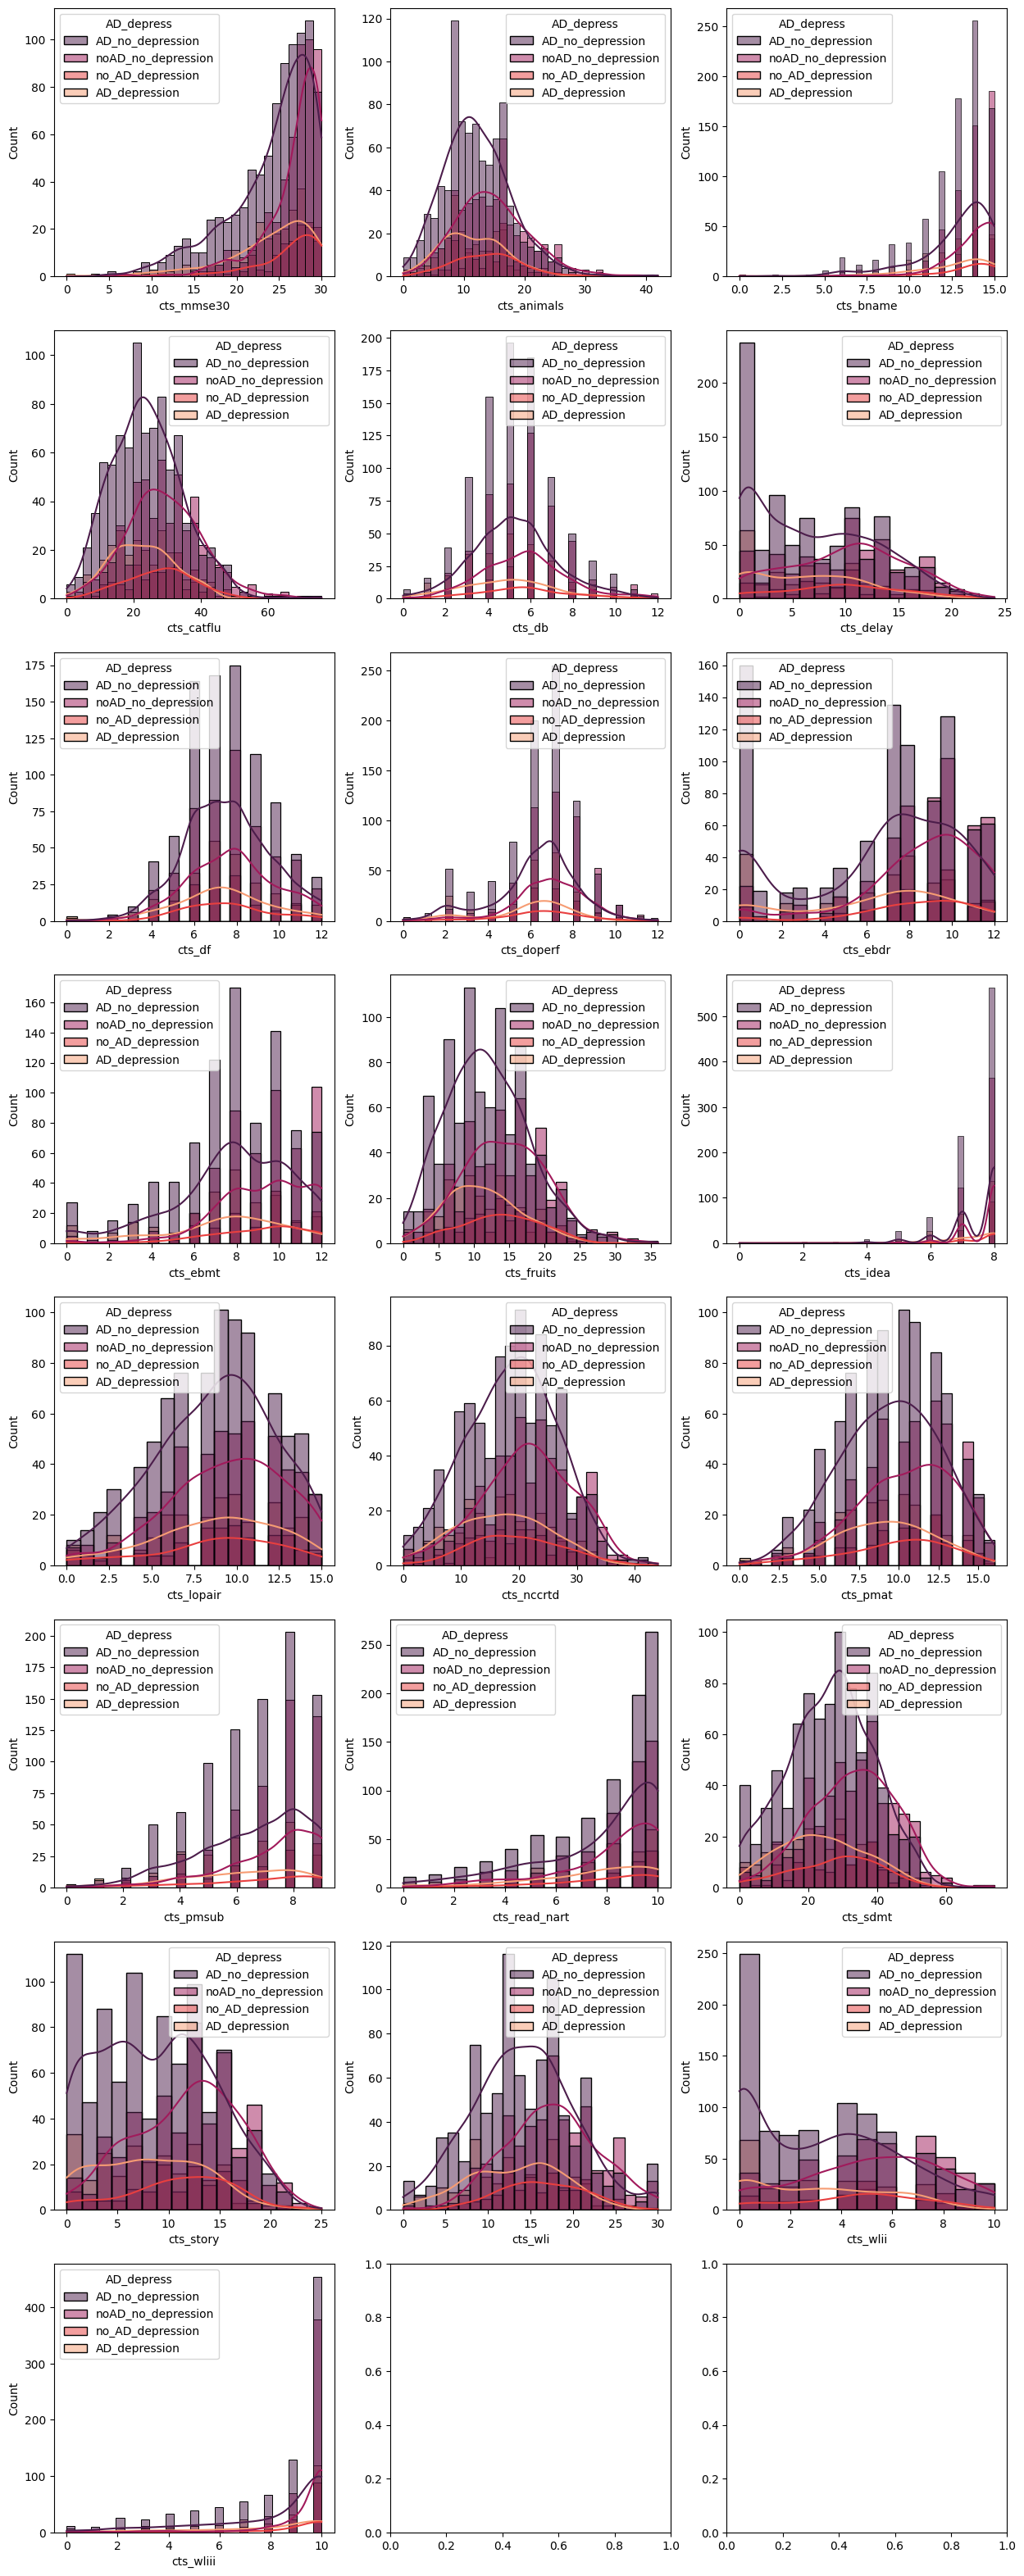

In [ ]:
# Distribution of Cognitive Score Features

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=8, figsize=(15, 40))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(cognitive):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data_nb, x=column, hue='AD_depress', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

In [ ]:
# Separating Cognitive Test Data Features from Sociodemographic Features
data_cog = data_nb[cognitive + target_column]

data_nb = data_nb[categorical_columns + numerical_columns + multinomial_columns + target_column]

### 1.2 Correlation Matrices By Class

<ipython-input-70-0e45d29af3cf>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



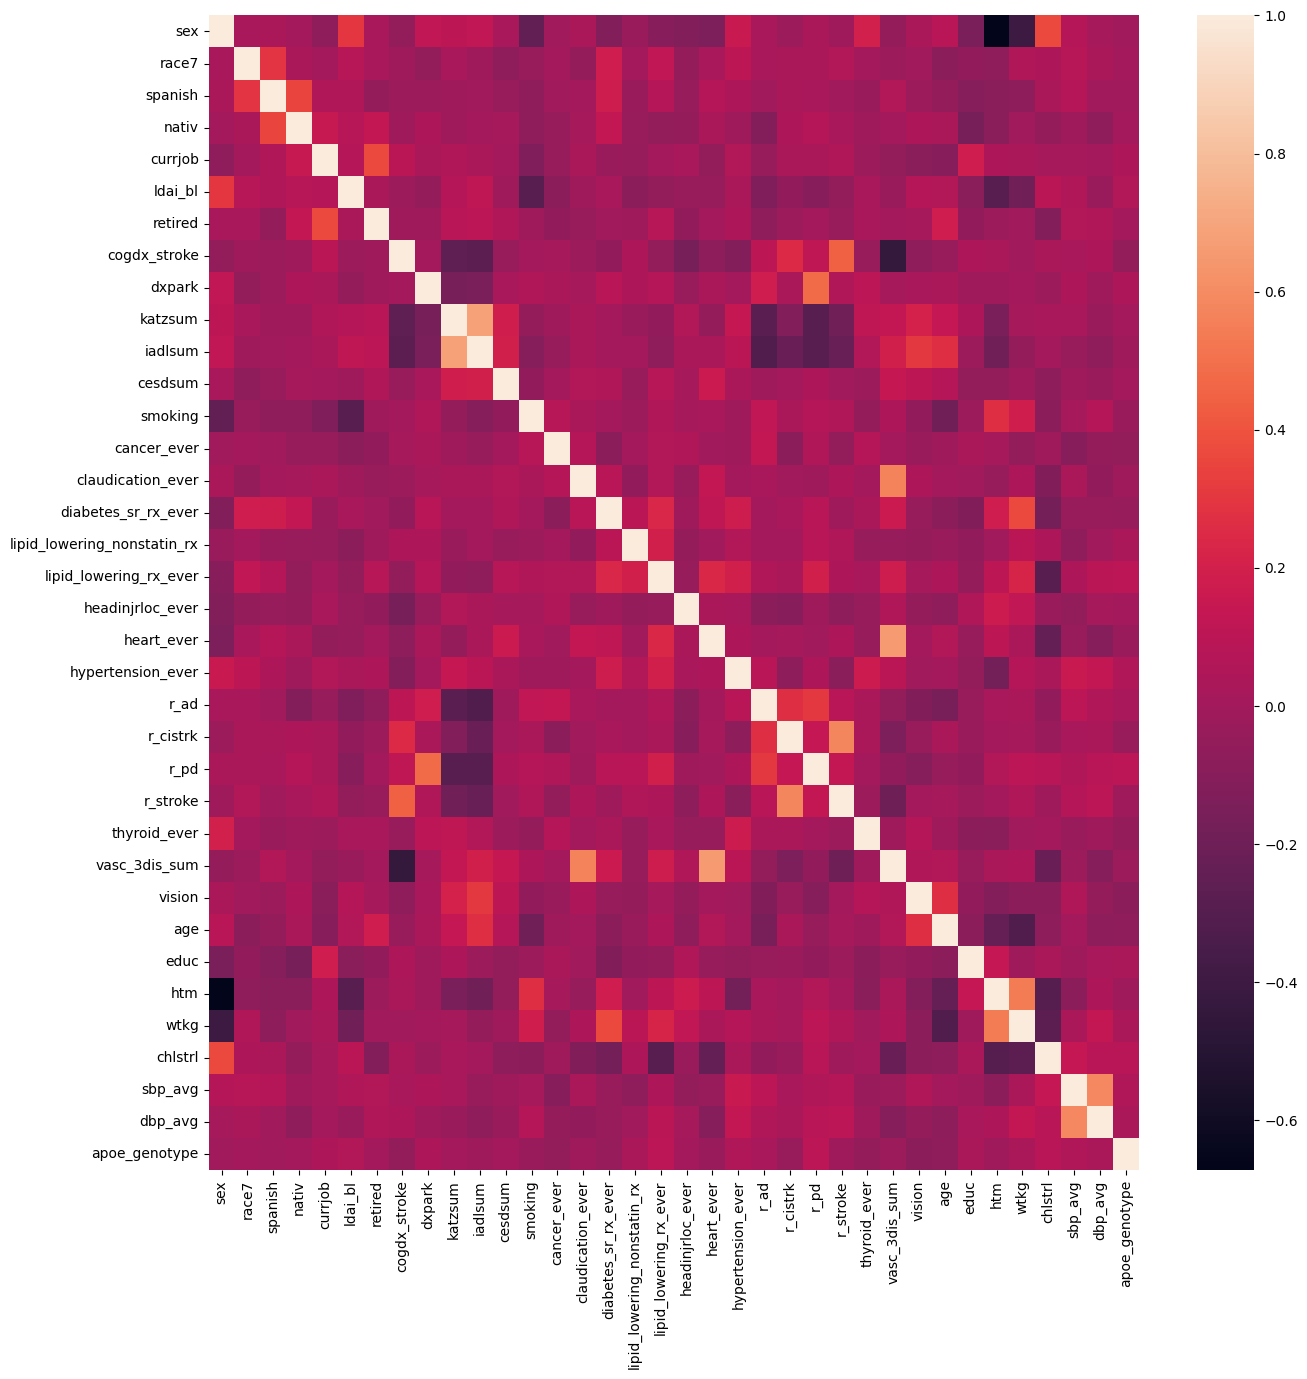

In [ ]:
# Correlation Matrix - noAD_no_depression

plt.figure(figsize=(15,15))
noAD_no_depression = data_nb.loc[data_nb['AD_depress']=="noAD_no_depression"]
sns.heatmap(noAD_no_depression.corr())
plt.show()

<ipython-input-71-4f4cc386e865>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



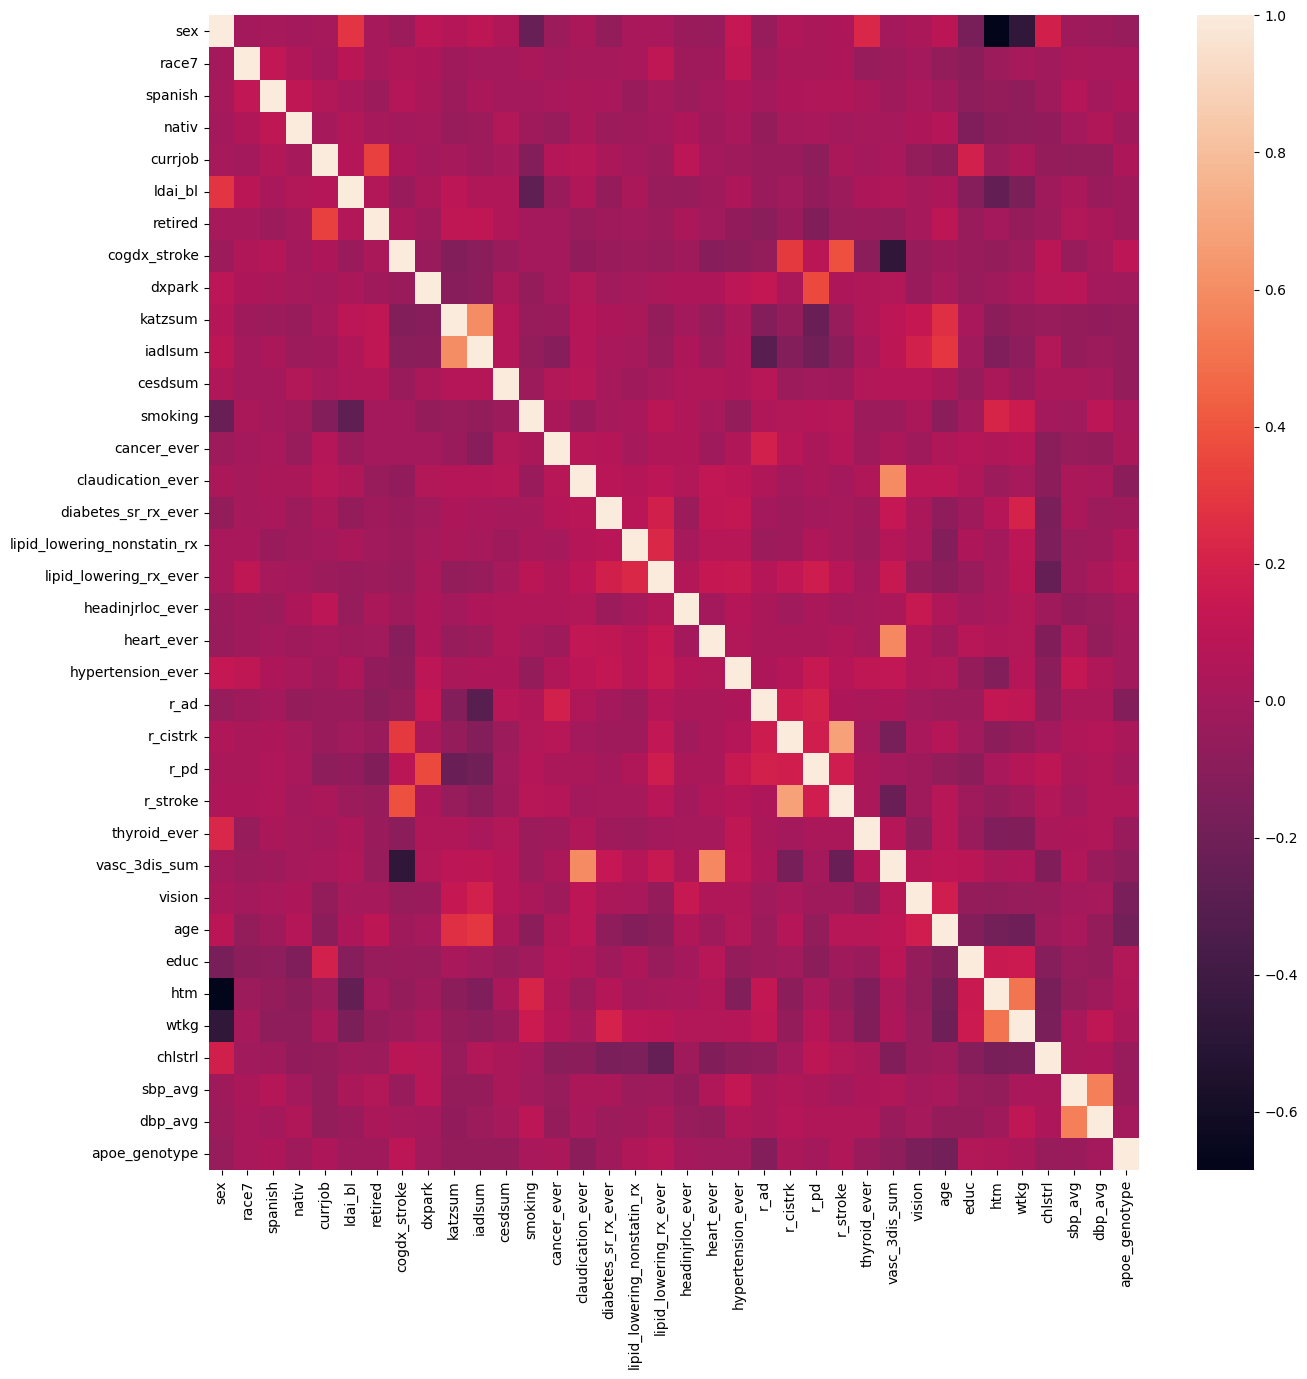

In [ ]:
# Correlation Matrix - AD_no_depression

plt.figure(figsize=(15,15))
AD_no_depression = data_nb.loc[data_nb['AD_depress']=="AD_no_depression"]
sns.heatmap(AD_no_depression.corr())
plt.show()


<ipython-input-72-5318790099dd>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



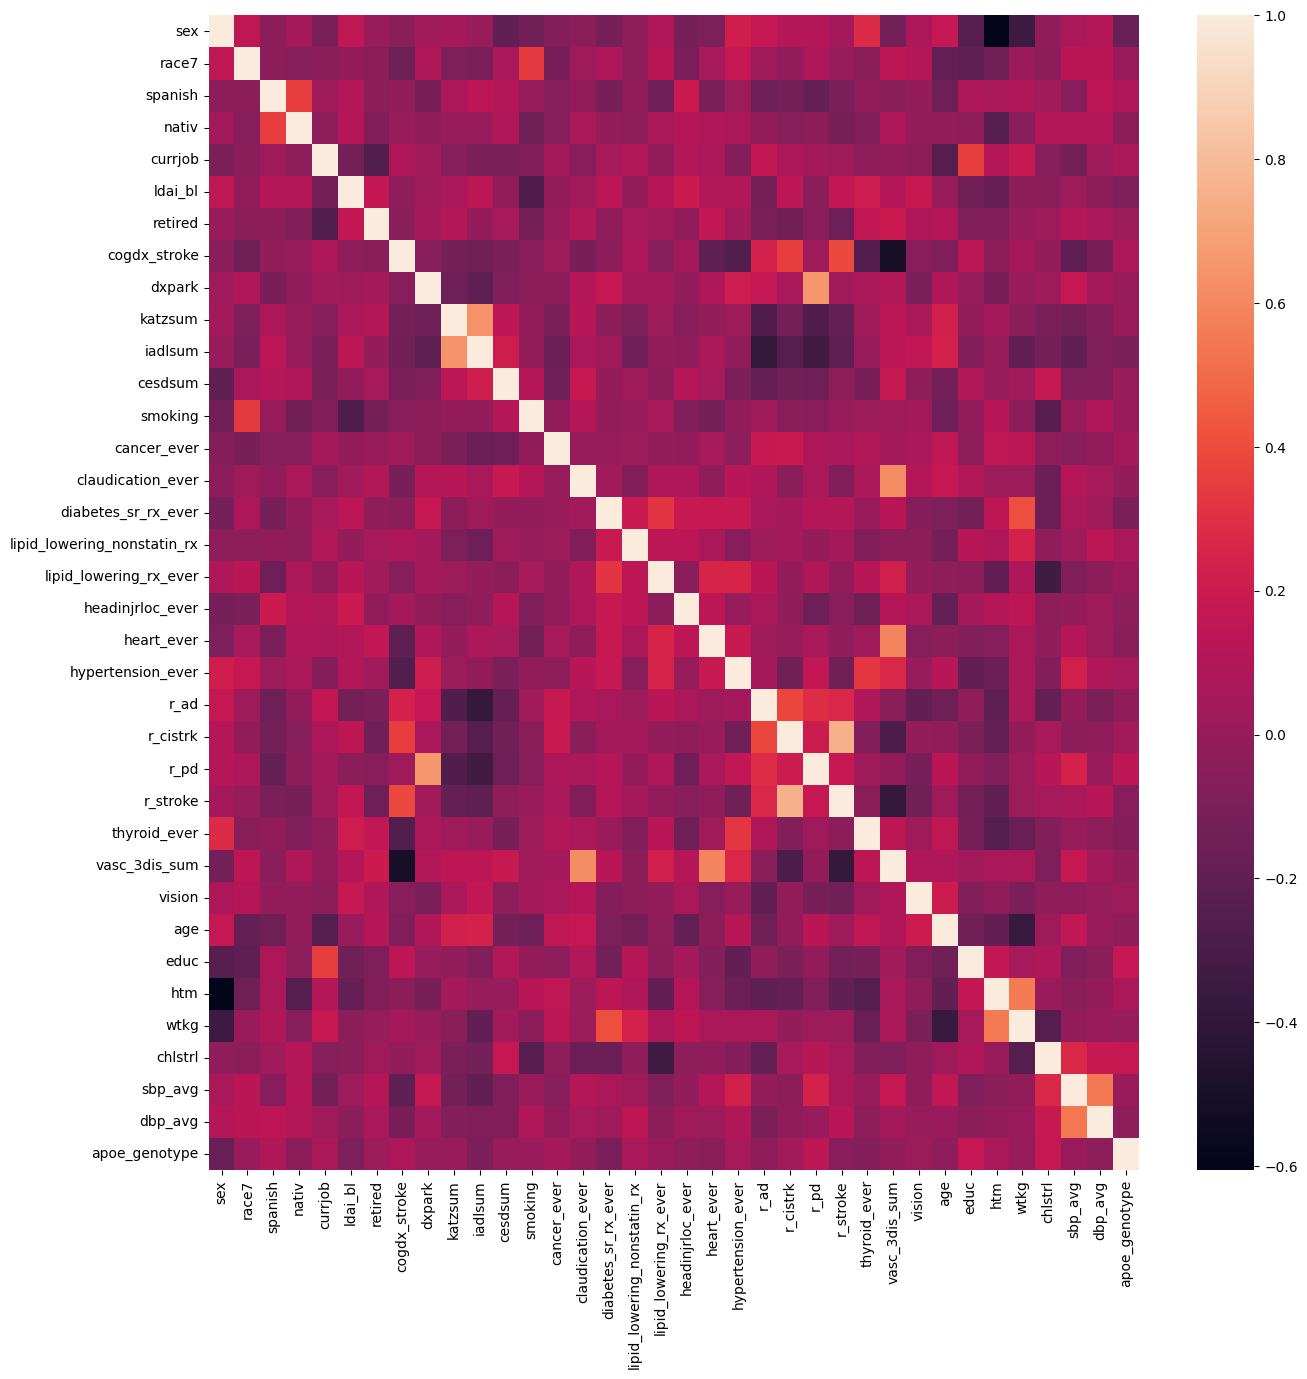

In [ ]:
# Correlation Matrix - no_AD_depression

plt.figure(figsize=(15,15))
no_AD_depression = data_nb.loc[data_nb['AD_depress']=="no_AD_depression"]
sns.heatmap(no_AD_depression.corr())
plt.show()

<ipython-input-73-4e5b26214292>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



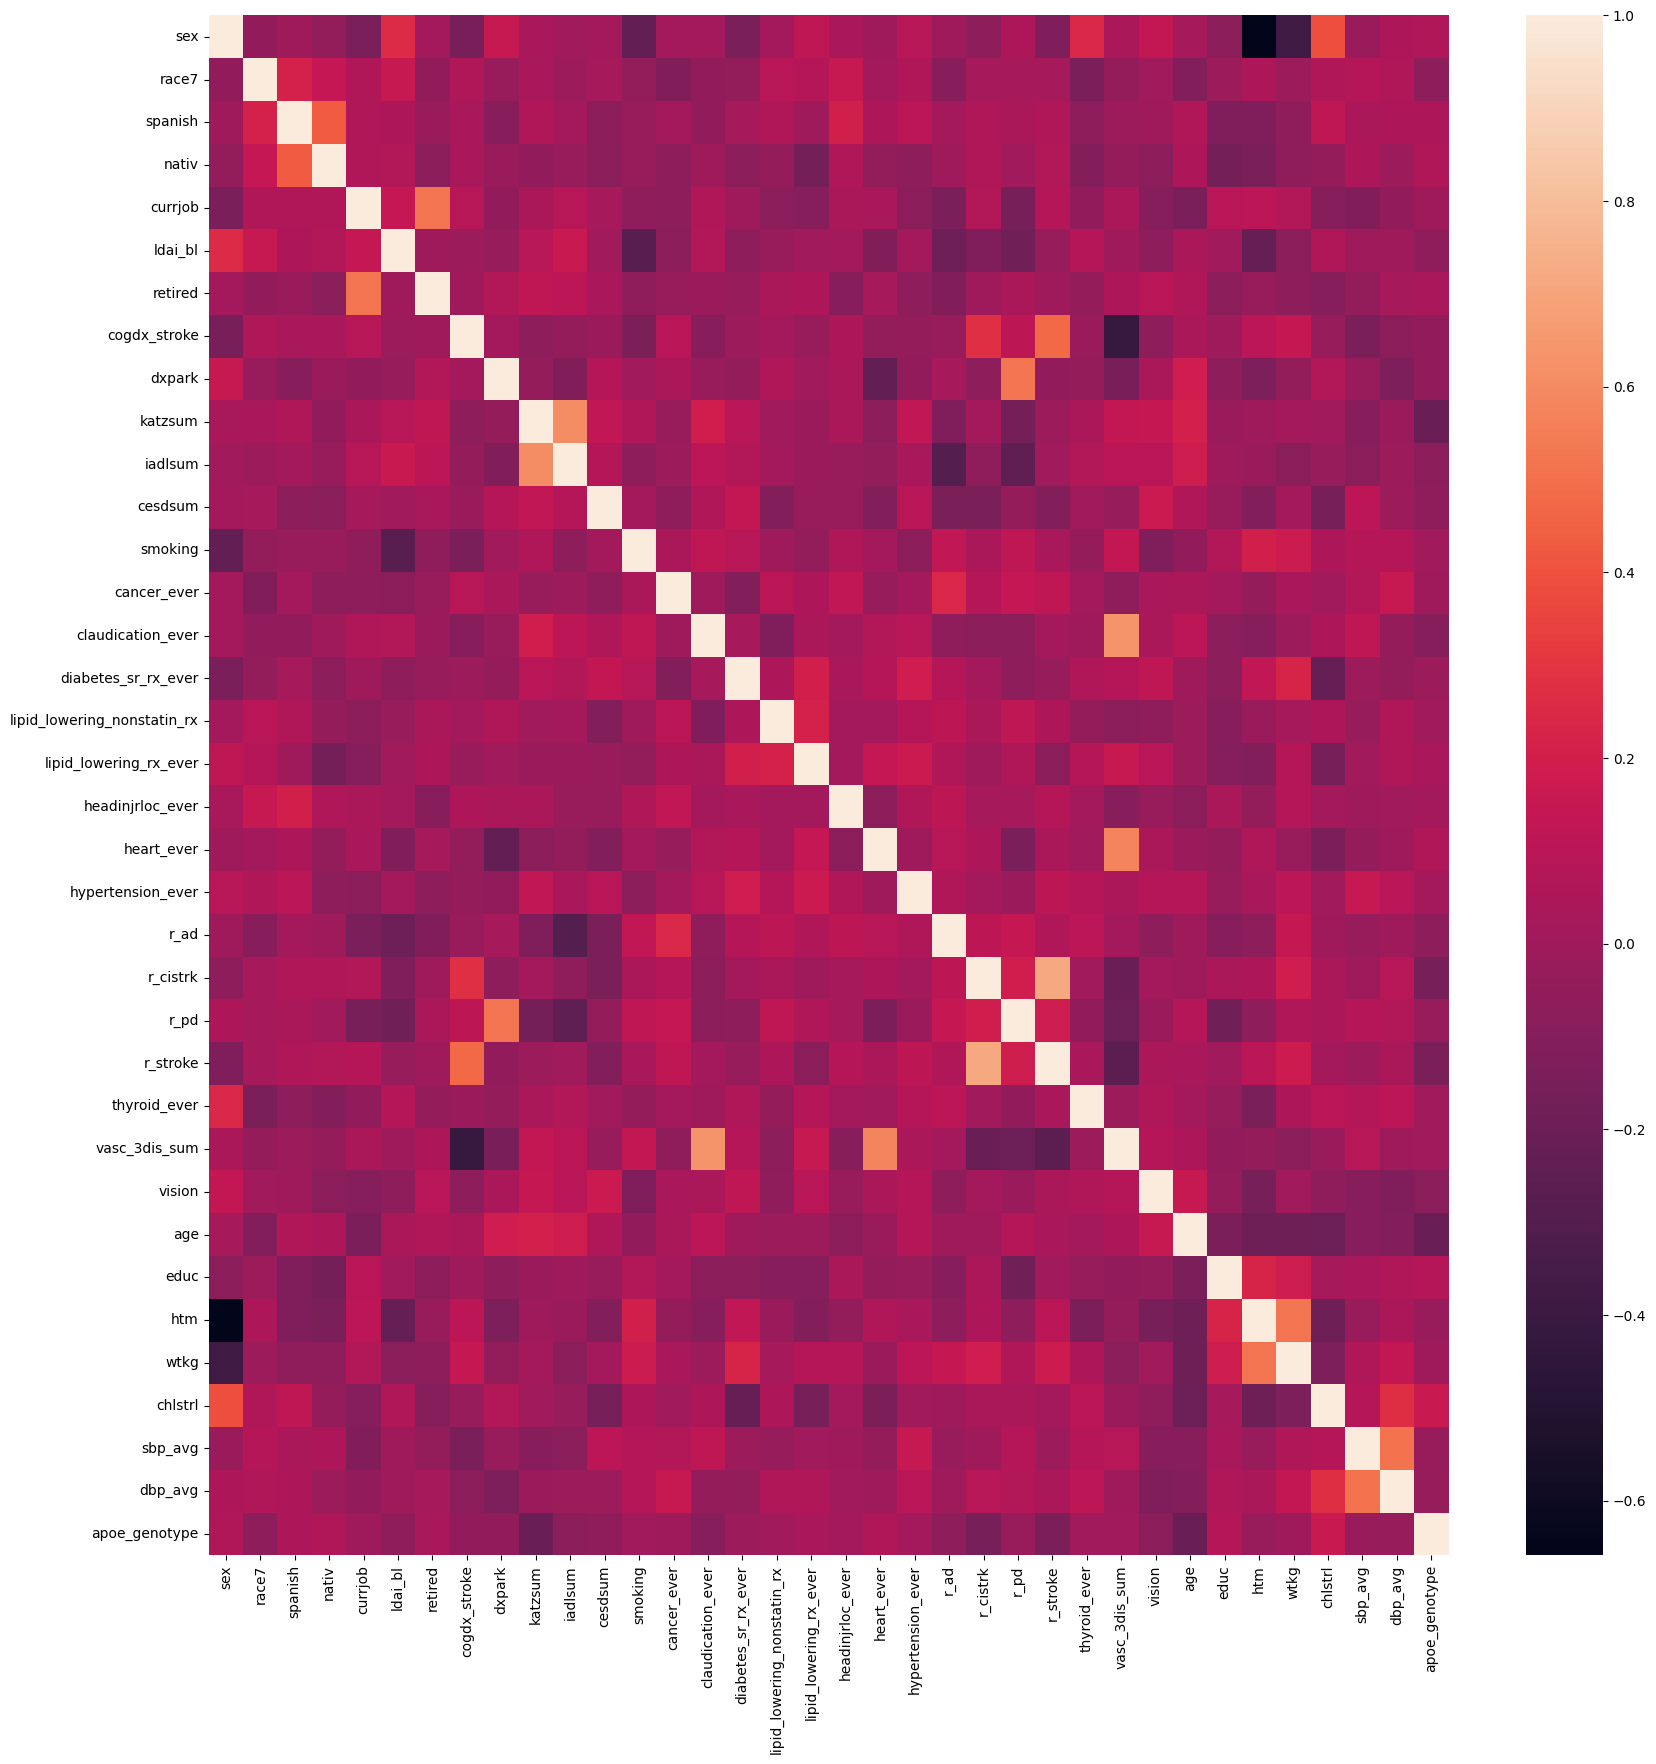

In [ ]:
# Correlation Matrix - AD_depression

plt.figure(figsize=(20,20))
AD_depression = data_nb.loc[data_nb['AD_depress']=="AD_depression"]
sns.heatmap(AD_depression.corr())
plt.show()


### 1.3 Checking for Data Imbalance

In [ ]:
# Checking for data imbalance

import plotly.express as px

# Compute the count of each class in the 'target' column
counts = data_nb['AD_depress'].value_counts()

# Define colors for the pie chart sections
colors = ['#581845', '#C70039', '#FF5733', '#FFC300']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "target"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in "AD_depress"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

In [ ]:
# converting categorical data into a numerical value
data_nb['AD_depress'].replace({"noAD_no_depression": 0, "AD_no_depression": 1, "no_AD_depression": 2, "AD_depression": 3}, inplace=True)

### 2. Splitting data into testing and training sets

In [ ]:
from sklearn.model_selection import train_test_split

X = data_nb[["age", "sex", "race7", "spanish", "nativ", "educ", "currjob", "retired", "cogdx_stroke", "dxpark", "apoe_genotype", "katzsum", "iadlsum", "cesdsum",
"htm", "wtkg", "ldai_bl", "smoking", "cancer_ever", "chlstrl", "claudication_ever", "diabetes_sr_rx_ever", "lipid_lowering_nonstatin_rx", "lipid_lowering_rx_ever",
"headinjrloc_ever", "heart_ever", "sbp_avg", "dbp_avg", "hypertension_ever", "r_ad", "r_cistrk", "r_pd", "r_stroke", "thyroid_ever",
"vasc_3dis_sum", "vision"]]

y = data_nb["AD_depress"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define utility functions for model evaluation

def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, acc

def print_scores(conf_matrix, class_report, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """

    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def multi_class_auc(Y, Y_prob):
  '''
  Prints out multi-class AUC Scores (one vs. rest)

  Y_prob = y_hat_prob prbabilities
  '''

  c = ['noAD_no_depression', 'AD_no_depression', 'no_AD_depression', 'AD_depression']
  one_hot_encoded_Y = pd.get_dummies(Y, columns=['AD_depress'])
  one_hot_encoded_Y.columns = c

  for i in range(4):
    auc = roc_auc_score(one_hot_encoded_Y[c[i]], Y_prob[:,i], multi_class='ovr', average='macro')
    print(f"AUC (one vs. rest) Score for {c[i]} : ", auc)

def multi_class_roc(Y, Y_prob):
  '''
  Prints out multi-class AUC Scores (one vs. rest) and ROC curve

  Y_prob = y_hat_prob prbabilities
  '''

  c = ['noAD_no_depression', 'AD_no_depression', 'no_AD_depression', 'AD_depression']
  one_hot_encoded_Y = pd.get_dummies(Y)
  one_hot_encoded_Y.columns = c

  for i in range(4):
    auc = roc_auc_score(one_hot_encoded_Y[c[i]], Y_prob[:,i], multi_class='ovr', average='macro')
    print(f"AUC (one vs. rest) Score for {c[i]} : ", auc)

    # Visualize the ROC curve for the validation data
    fpr, tpr, thresholds = roc_curve(one_hot_encoded_Y[c[i]], Y_prob[:, i])
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LDA') # Updating the estimator name to LDA
    display.plot()
    ax = plt.gca()
    ax.set_title(f'ROC Curve, {c[i]}')
    ax.get_lines()[0].set_color('#7ec4a9')
    plt.show()
    print('\n')

### ML Pipeline # 3-6: Cross-validation, Imputation, Model Fitting, Model Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# ML Pipeline Step 3: Cross-validation using stratified K-fold
kf = StratifiedKFold(n_splits = 5)

for train_index, valid_index in kf.split(X_train, Y_train):
  X_train_data, X_valid_data = pd.DataFrame(X_train.iloc[train_index]), pd.DataFrame(X_train.iloc[valid_index])
  Y_train_data, Y_valid_data = pd.DataFrame(Y_train.iloc[train_index]), pd.DataFrame(Y_train.iloc[valid_index])

  ### ML Pipeline Step 4: Imputation of Missing Values
  # 1) Imputing Categorical Data
  for i in categorical_columns:
    X_train_data[i].fillna(X_train_data[i].mode(), inplace=True)
    X_valid_data[i].fillna(X_valid_data[i].mode(), inplace=True)

  # 2) Imputing other data using MICE
  # set min_value = 0 because it is imputing negative numbers which cannot exist in our dataset
  imputer_bayes = IterativeImputer(max_iter = 10, random_state=0, min_value=[0]*36) #### change this back to 62 later
  X_train_data_imputed = imputer_bayes.fit_transform(X_train_data)
  X_valid_data_imputed = imputer_bayes.transform(X_valid_data)

  ### ML Pipeline Step 5: Model Fitting
  model = LinearDiscriminantAnalysis()
  model.fit(X_train_data_imputed, np.ravel(Y_train_data))
  y_hat_prob = model.predict_proba(X_train_data_imputed)
  y_hat = model.predict(X_train_data_imputed)

  ### ML Pipeline Step 6: Model Validation
  y_hat_prob_valid = model.predict_proba(X_valid_data_imputed)
  y_hat_valid = model.predict(X_valid_data_imputed)

  # Evaluating the model's performance on the validation set
  conf_matrix, class_report, acc = get_scores(Y_valid_data, y_hat_valid)
  print_scores(conf_matrix, class_report, acc)
  multi_class_auc(Y_valid_data, y_hat_prob_valid)
  print('\n')


Accuracy :  0.6424581005586593
Confusion Matrix:
[[ 94 112   0   0]
 [ 76 286   0   0]
 [  3   1  18  25]
 [  7   5  27  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       206
           1       0.71      0.79      0.75       362
           2       0.40      0.38      0.39        47
           3       0.71      0.61      0.66       101

    accuracy                           0.64       716
   macro avg       0.59      0.56      0.57       716
weighted avg       0.63      0.64      0.64       716

AUC (one vs. rest) Score for noAD_no_depression :  0.7507519512659433
AUC (one vs. rest) Score for AD_no_depression :  0.7996847395199301
AUC (one vs. rest) Score for no_AD_depression :  0.9291416213465636
AUC (one vs. rest) Score for AD_depression :  0.9694276744747645


Accuracy :  0.6475524475524476
Confusion Matrix:
[[ 65 140   1   0]
 [ 48 314   0   0]
 [  2   4  14  26]
 [  1  12  18  70]]

Classification 

## 7. Model Testing using Test Data

Accuracy :  0.6201117318435754
Confusion Matrix:
[[ 29  72   0   0]
 [ 19 151   0   0]
 [  1   3   6  30]
 [  1   3   7  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.29      0.38       101
           1       0.66      0.89      0.76       170
           2       0.46      0.15      0.23        40
           3       0.55      0.77      0.64        47

    accuracy                           0.62       358
   macro avg       0.56      0.52      0.50       358
weighted avg       0.60      0.62      0.58       358

AUC (one vs. rest) Score for noAD_no_depression :  0.7936587433062372


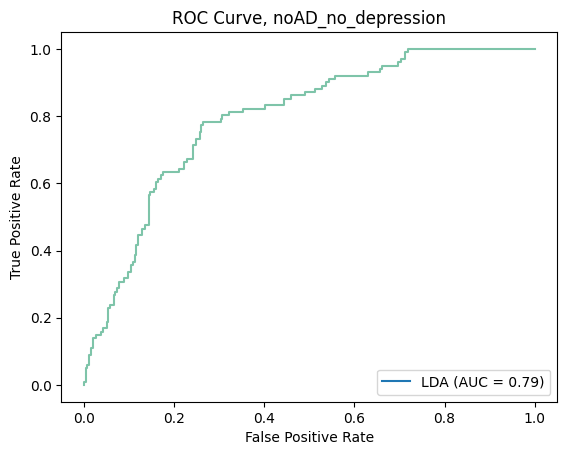



AUC (one vs. rest) Score for AD_no_depression :  0.8375156445556946


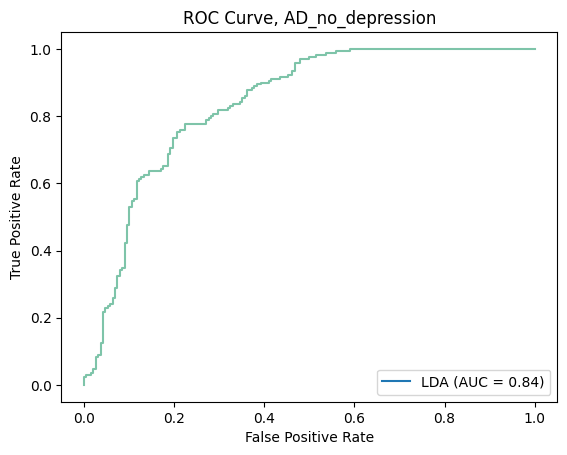



AUC (one vs. rest) Score for no_AD_depression :  0.9116352201257862


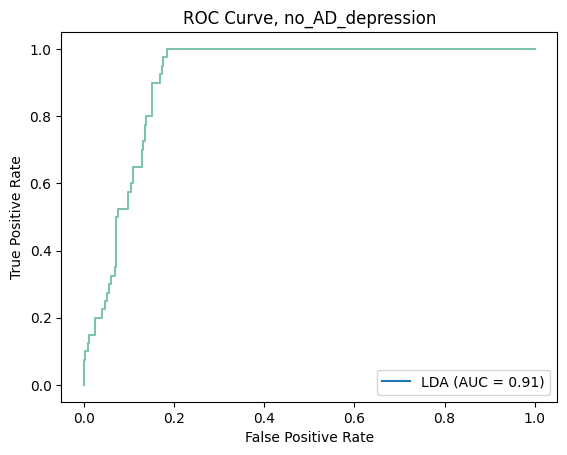



AUC (one vs. rest) Score for AD_depression :  0.9422590134774577


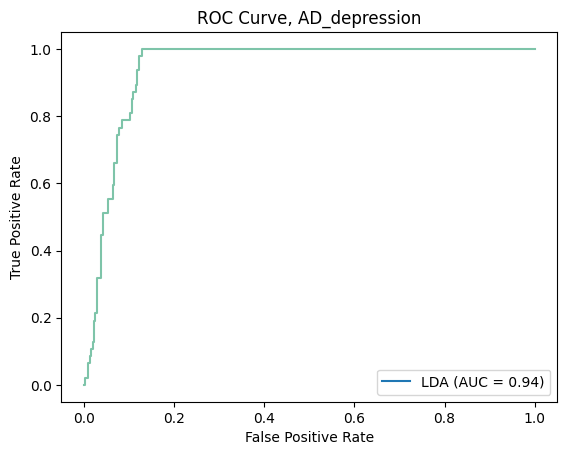

In [ ]:
### Impute missing data
# 1) Imputing Categorical Data
for i in categorical_columns:
    X_test[i].fillna(X_test[i].mode(), inplace=True)

# 2) Imputing Other Data
imputer_bayes = IterativeImputer(max_iter = 10, random_state=0, min_value=[0]*36) ### change this back later
X_test_imputed = imputer_bayes.fit_transform(X_test)

y_hat_prob_test = model.predict_proba(X_test_imputed)
y_hat_test = model.predict(X_test_imputed)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test, y_hat_test)
print_scores(conf_matrix, class_report, acc)
multi_class_roc(Y_test, y_hat_prob_test)


## LDA Part 2: With Upsampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# ML Pipeline Step 3: Cross-validation using stratified K-fold
kf = StratifiedKFold(n_splits = 5)

for train_index, valid_index in kf.split(X_train, Y_train):
  X_train_data, X_valid_data = pd.DataFrame(X_train.iloc[train_index]), pd.DataFrame(X_train.iloc[valid_index])
  Y_train_data, Y_valid_data = pd.DataFrame(Y_train.iloc[train_index]), pd.DataFrame(Y_train.iloc[valid_index])

  ### ML Pipeline Step 4: Imputation of Missing Values
  # 1) Imputing Categorical Data
  for i in categorical_columns:
    X_train_data[i].fillna(X_train_data[i].mode(), inplace=True)
    X_valid_data[i].fillna(X_valid_data[i].mode(), inplace=True)

  # 2) Imputing other data using MICE
  # set min_value = 0 because it is imputing negative numbers which cannot exist in our dataset
  imputer_bayes = IterativeImputer(max_iter = 10, random_state=0, min_value=[0]*36) ### change this back later
  X_train_data_imputed = imputer_bayes.fit_transform(X_train_data)
  X_valid_data_imputed = imputer_bayes.transform(X_valid_data)

  # upsampling minority classes as AD_depress==2 is performing poorly against other classes
  ros = RandomOverSampler()
  X_train_resampled, y_train_resampled = ros.fit_resample(X_train_data_imputed, Y_train_data)
  print(Counter(y_train_resampled["AD_depress"]))

  ### ML Pipeline Step 5: Model Fitting
  model_upsampling = LinearDiscriminantAnalysis()
  model_upsampling.fit(X_train_resampled, np.ravel(y_train_resampled))
  y_hat_prob = model_upsampling.predict_proba(X_train_resampled)
  y_hat = model_upsampling.predict(X_train_resampled)

  ### ML Pipeline Step 6: Model Validation
  y_hat_prob_valid = model_upsampling.predict_proba(X_valid_data_imputed)
  y_hat_valid = model_upsampling.predict(X_valid_data_imputed)

  # Evaluating the model's performance on the validation set
  conf_matrix, class_report, acc = get_scores(Y_valid_data, y_hat_valid)
  print_scores(conf_matrix, class_report, acc)
  multi_class_auc(Y_valid_data, y_hat_prob_valid)
  print('\n')


Counter({3: 579, 1: 579, 2: 579, 0: 579})
Accuracy :  0.6167247386759582
Confusion Matrix:
[[53 29  0  0]
 [57 87  0  1]
 [ 1  0  8 10]
 [ 4  1  7 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54        82
           1       0.74      0.60      0.66       145
           2       0.53      0.42      0.47        19
           3       0.72      0.71      0.72        41

    accuracy                           0.62       287
   macro avg       0.62      0.59      0.60       287
weighted avg       0.65      0.62      0.62       287

AUC (one vs. rest) Score for noAD_no_depression :  0.7593694229625223
AUC (one vs. rest) Score for AD_no_depression :  0.7918892666342885
AUC (one vs. rest) Score for no_AD_depression :  0.9177140612725845
AUC (one vs. rest) Score for AD_depression :  0.9667856434661908


Counter({3: 579, 0: 579, 1: 579, 2: 579})
Accuracy :  0.5944055944055944
Confusion Matrix:
[[53 27  1  1]
 [55 85  0

## Upsampled Model Testing on Test Data

Accuracy :  0.6256983240223464
Confusion Matrix:
[[ 62  37   2   0]
 [ 54 116   0   0]
 [  1   0   9  30]
 [  0   0  10  37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       101
           1       0.76      0.68      0.72       170
           2       0.43      0.23      0.30        40
           3       0.55      0.79      0.65        47

    accuracy                           0.63       358
   macro avg       0.57      0.58      0.56       358
weighted avg       0.63      0.63      0.62       358

AUC (one vs. rest) Score for noAD_no_depression :  0.7901914705089186


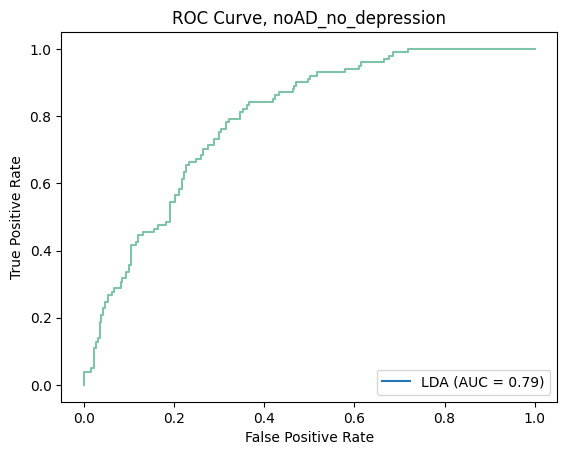



AUC (one vs. rest) Score for AD_no_depression :  0.8375156445556946


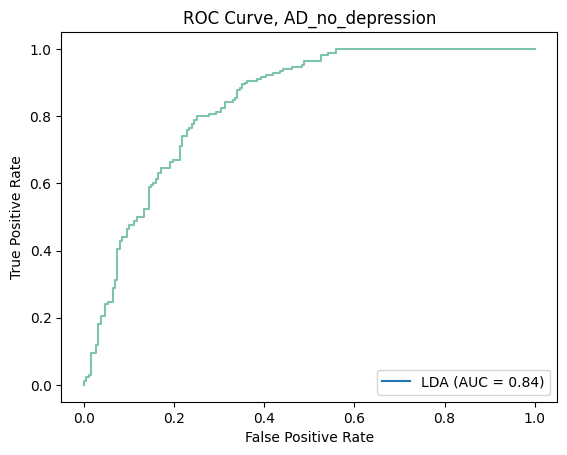



AUC (one vs. rest) Score for no_AD_depression :  0.9232704402515723


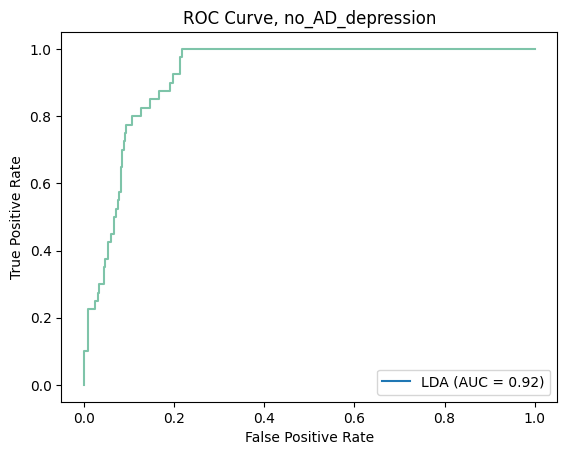



AUC (one vs. rest) Score for AD_depression :  0.9511527673257166


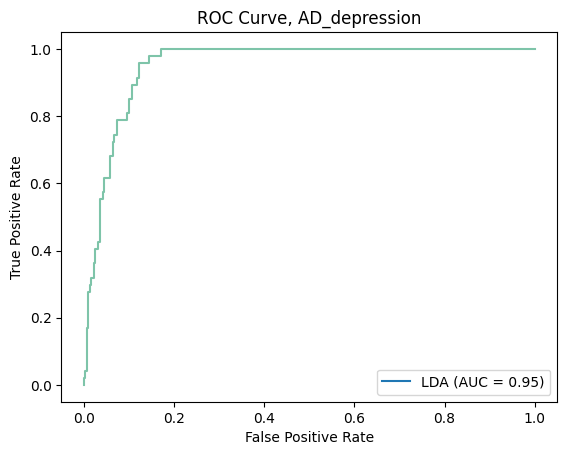

In [ ]:
# Data was already imputed above, only need to upsample this time
y_hat_prob_test_up = model_upsampling.predict_proba(X_test_imputed)
y_hat_test_up = model_upsampling.predict(X_test_imputed)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test, y_hat_test_up)
print_scores(conf_matrix, class_report, acc)
multi_class_roc(Y_test, y_hat_prob_test_up)

## LDA With Cognitive Test Scores with Upsampled Data

In [ ]:
X_cog = data_cog[cognitive]

y_cog = data_cog["AD_depress"]

X_train_cog, X_test_cog, Y_train_cog, Y_test_cog = train_test_split(X_cog, y_cog, test_size=0.2, random_state=42)

In [ ]:
# ML Pipeline Step 3: Cross-validation using stratified K-fold
kf = StratifiedKFold(n_splits = 5)

for train_index, valid_index in kf.split(X_train_cog, Y_train_cog):
  X_train_data, X_valid_data = pd.DataFrame(X_train_cog.iloc[train_index]), pd.DataFrame(X_train_cog.iloc[valid_index])
  Y_train_data, Y_valid_data = pd.DataFrame(Y_train_cog.iloc[train_index]), pd.DataFrame(Y_train_cog.iloc[valid_index])

  ### ML Pipeline Step 4: Imputation of Missing Values using MICE
  # set min_value = 0 because it is imputing negative numbers which cannot exist in our dataset
  imputer_cog = IterativeImputer(max_iter = 20, random_state=0, min_value=[0]*22) ### change this back later
  X_train_data_imputed = imputer_cog.fit_transform(X_train_data)
  X_valid_data_imputed = imputer_cog.transform(X_valid_data)

  # upsampling minority classes as AD_depress==2 is performing poorly against other classes
  ros = RandomOverSampler()
  X_train_resampled, y_train_resampled = ros.fit_resample(X_train_data_imputed, Y_train_data)
  print("Class Distribution:", Counter(y_train_resampled["AD_depress"]))

  ### ML Pipeline Step 5: Model Fitting
  model_cog = LinearDiscriminantAnalysis()
  model_cog.fit(X_train_resampled, np.ravel(y_train_resampled))
  y_hat_prob = model_cog.predict_proba(X_train_resampled)
  y_hat = model_cog.predict(X_train_resampled)

  ### ML Pipeline Step 6: Model Validation
  y_hat_prob_valid = model_cog.predict_proba(X_valid_data_imputed)
  y_hat_valid = model_cog.predict(X_valid_data_imputed)

  # Evaluating the model's performance on the validation set
  conf_matrix, class_report, acc = get_scores(Y_valid_data, y_hat_valid)
  print_scores(conf_matrix, class_report, acc)
  multi_class_auc(Y_valid_data, y_hat_prob_valid)
  print('\n')

Class Distribution: Counter({'AD_depression': 579, 'AD_no_depression': 579, 'no_AD_depression': 579, 'noAD_no_depression': 579})
Accuracy :  0.3310104529616725
Confusion Matrix:
[[13 15  6  7]
 [34 40 46 25]
 [12 11 36 23]
 [ 1  5  7  6]]

Classification Report:
                    precision    recall  f1-score   support

     AD_depression       0.22      0.32      0.26        41
  AD_no_depression       0.56      0.28      0.37       145
noAD_no_depression       0.38      0.44      0.41        82
  no_AD_depression       0.10      0.32      0.15        19

          accuracy                           0.33       287
         macro avg       0.31      0.34      0.30       287
      weighted avg       0.43      0.33      0.35       287

AUC (one vs. rest) Score for noAD_no_depression :  0.6182827681935356
AUC (one vs. rest) Score for AD_no_depression :  0.5328800388538125
AUC (one vs. rest) Score for no_AD_depression :  0.6479476502082093
AUC (one vs. rest) Score for AD_depression :  0.

Accuracy :  0.31564245810055863
Confusion Matrix:
[[20  6  6 15]
 [59 34 39 38]
 [13 14 46 28]
 [ 5 10 12 13]]

Classification Report:
                    precision    recall  f1-score   support

     AD_depression       0.21      0.43      0.28        47
  AD_no_depression       0.53      0.20      0.29       170
noAD_no_depression       0.45      0.46      0.45       101
  no_AD_depression       0.14      0.33      0.19        40

          accuracy                           0.32       358
         macro avg       0.33      0.35      0.30       358
      weighted avg       0.42      0.32      0.32       358

AUC (one vs. rest) Score for noAD_no_depression :  0.6011493466511597


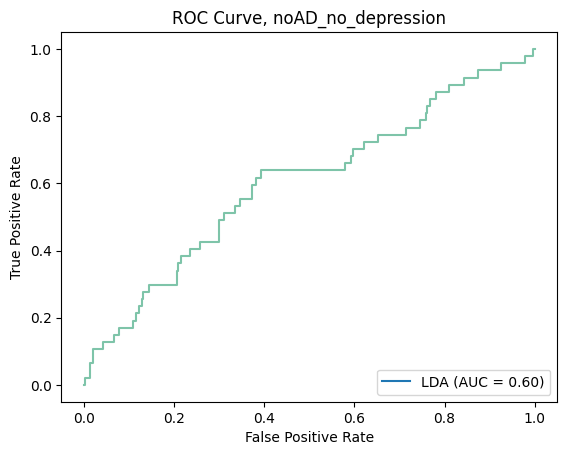



AUC (one vs. rest) Score for AD_no_depression :  0.628316645807259


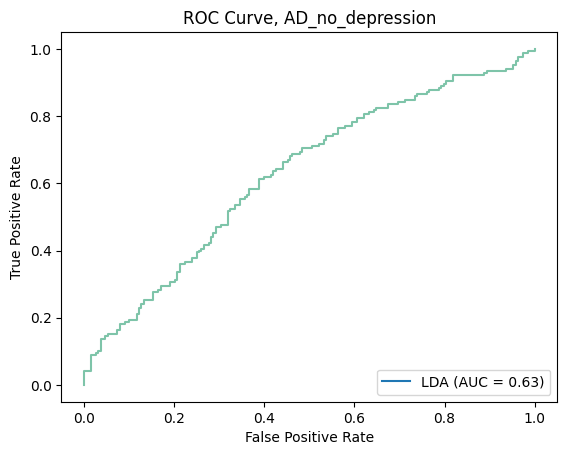



AUC (one vs. rest) Score for no_AD_depression :  0.6991562969526524


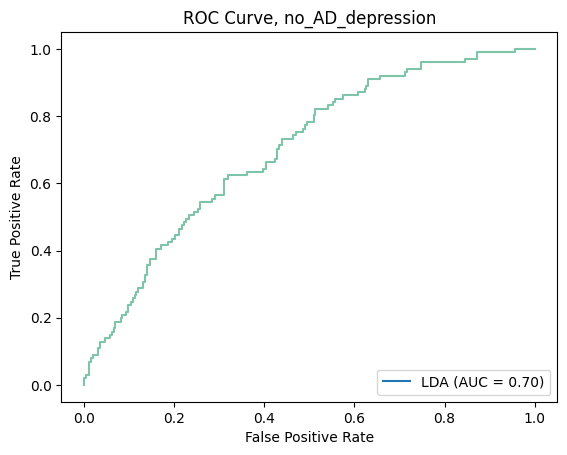



AUC (one vs. rest) Score for AD_depression :  0.5258647798742139


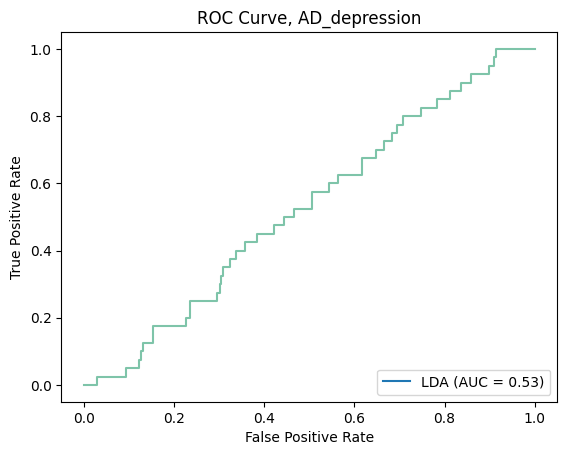

In [ ]:
imputer_cog = IterativeImputer(max_iter = 20, random_state=0, min_value=[0]*22)
X_test_cog_imputed = imputer_cog.fit_transform(X_test_cog)
X_test_cog_imputed = imputer_cog.transform(X_test_cog)

y_hat_prob_test_cog = model_cog.predict_proba(X_test_cog_imputed)
y_hat_test_cog = model_cog.predict(X_test_cog_imputed)

# Evaluating the model's performance on the validation set
conf_matrix, class_report, acc = get_scores(Y_test_cog, y_hat_test_cog)
print_scores(conf_matrix, class_report, acc)
multi_class_roc(Y_test_cog, y_hat_prob_test_cog)